<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**


Name: Aashi Aashi

EID: aa92533

Name: Soumya Agrawal

EID: sa55638

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

### Answer:


**Advantages of CatBoost over XGBoost:**  
a) Catboost performs exceptionally well on categorical data as compared to XGBoost  
b) CatBoost automatically performs one hot encoding on the categorical columns. All we need to is pass the parameter    one_hot_max_size- This uses one-hot encoding for all features with number of different values less than or equal to the given parameter value. **Pass indices of categorical columns to cat_features**       
c) CatBoost builds symmetric (balanced) trees, unlike XGBoost- This balanced tree architecture aids in efficient CPU implementation resulting in less prediction time, makes swift model appliers, and controls overfitting as the structure serves as regularization.     
d) CatBoost avoid target leakage and overfitting by using ordered boosting which is a permutation-driven method that trains a model on a piece of data while computing residuals on a different subset.    
e) CatBoost supports all kinds of features - numeric, categorical, or text and saves time and effort of preprocessing.   
f) CatBoost has an overfitting detector that can stop training earlier than the training parameters dictate if overfitting occurs   
g) CatBoost provides three inherent missing values strategies for processing missing values    

**Disadvantages of CatBoost over XGBoost:**
a) CatBoost performs better only if there are categorical variables in the data which have been tuned properly    
b) An int type column will by default be treated as a numerical column. so we need to be very careful with columns while passing it to model   
c) XGBoost has some more generalization capabilities than other boosting techniques    



# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [9]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [10]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
columns_list = list(X.columns)

In [20]:
model_scores = dict()
scores = pd.DataFrame(columns=['model','accuracy','roc_auc_score'])

In [21]:
# Part a)
model = DecisionTreeClassifier(random_state = 14)
result = model.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Accuracy score for DT is = ',accuracy_score(y_test, prediction))
print('ROC_AUC score for DT is = ',roc_auc_score(y_test, pred_probs))

model_scores['model'] = 'decision_tree'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Accuracy score for DT is =  0.888
ROC_AUC score for DT is =  0.5854582176218127


In [22]:
# Part b)

model = BaggingClassifier(DecisionTreeClassifier(random_state = 14), n_estimators=25, random_state = 14)
result = model.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Accuracy score for Bagging is = ',accuracy_score(y_test, prediction))
print('ROC_AUC score for Bagging is = ',roc_auc_score(y_test, pred_probs))

model_scores['model'] = 'bagging'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Accuracy score for Bagging is =  0.9256
ROC_AUC score for Bagging is =  0.7857106791214341


Optimal Hyperparameters are: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17} 

ROC AUC score for Random Forest Classifier is =  0.8375612219136582 

Confusion matrix : 


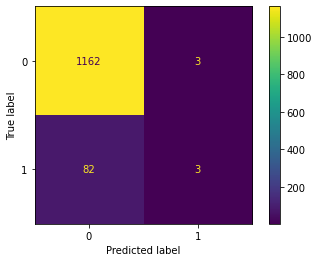

In [23]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Optimal Hyperparameters are: %s' % result.best_params_,'\n')
print('ROC AUC score for Random Forest Classifier is = ',roc_auc_score(y_test, pred_probs), '\n')
print('Confusion matrix : \n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'random_forest'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Optimal Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17} 

ROC AUC score for AdaBoost Classifier is=  0.8390254986114618 

Confusion matrix :


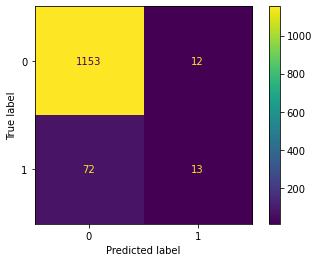

In [24]:
# Part d)
clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]

print('Optimal Hyperparameters: %s' % result.best_params_,'\n')
print('ROC AUC score for AdaBoost Classifier is= ',roc_auc_score(y_test, pred_probs), '\n')
print('Confusion matrix :\n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'ada_boost'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Optimal Hyperparameters are: {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17} 

ROC AUC score for Gradient Boosting Classifier is=  0.8366372128250441 

Confusion matrix :


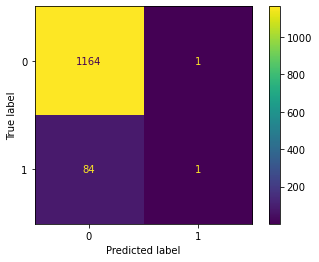

In [25]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Optimal Hyperparameters are: %s' % result.best_params_,'\n')
print('ROC AUC score for Gradient Boosting Classifier is= ',roc_auc_score(y_test, pred_probs), '\n')
print('Confusion matrix :\n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'gradient_boosting'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

In [26]:
# Part f)
scores

,model,accuracy,roc_auc_score
0,decision_tree,0.888,0.585458
1,bagging,0.9256,0.785711
2,random_forest,0.932,0.837561
3,ada_boost,0.9328,0.839025
4,gradient_boosting,0.932,0.836637


## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [4]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.407 s
predict time 0.003 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.385 s
predict time 0.003 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.341 s
predict time 0.003 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



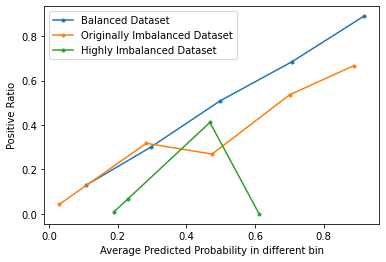

In [5]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)

#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='uniform')
#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='uniform')
#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='uniform')
plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in different bin')
plt.ylabel('Positive Ratio')
plt.show()

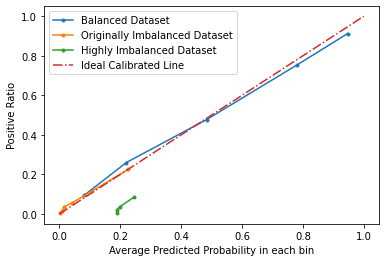

In [8]:
#Plot all calibration curves for strategy = 'quantile'

#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='quantile')
#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='quantile')
#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='quantile')
plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')

plt.plot([0, 1], [0, 1], linestyle = '-.', label = 'Ideal Calibrated Line')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Positive Ratio')
plt.show()

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

### Answer:

a) On a broad level, skip connections causes some network layers to be skipped, as the name suggests. In essence, it gives the gradient a different course. This aids skip connections in achieving a significantly smoother loss surface, hastening the convergence of the model.  
There are two ways to perform skip connections:   
1. ResNet (skip connections via addition): back-propagating through the identity function    
2. DenseNet (skip connections via concatenation): concatenation of feature maps to ensure maximum information flow between layers.  

b) By normalizing our inputs using this technique, we provide an equal playing field for all model parameters, which speeds up model convergence.  It turns out that by using this normalization technique and normalizing each layer based on batch/mini-batch statistics, the model converges more quickly by preventing unstable gradients. When the parameters are in various scales, expanding and vanishing gradients may occur.